In [87]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



https://www.kaggle.com/c/house-prices-advanced-regression-techniques/code

    

# Data Preprocessing 1.0 

In [51]:
os.chdir('/Users/nanliao/Desktop/网课们/kaggle product recommendation/data')

In [96]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [97]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [132]:
idsUnique = len(set(train.Id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 1460 total entries


In [98]:
#Checking for missing data for both training and testing data
NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]
#only keep columns that contain NAs

,Train,Test
MSZoning,0,4.0
LotFrontage,259,227.0
Alley,1369,1352.0
Utilities,0,2.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
MasVnrType,8,16.0
MasVnrArea,8,15.0
BsmtQual,37,44.0
BsmtCond,37,45.0


In [99]:
#split the y variables 

train_labels = train.pop('SalePrice')

#combine to better process the data
features = pd.concat([train, test], keys=['train', 'test'])

#get rid of features that have more than half of missing information or do not correlate to SalePrice
features.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

In [100]:
features.head()
#still left with 56 columns

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour LotConfig  ... FireplaceQu GarageType GarageFinish  \
train 0         Lvl    Inside  ...         NaN     Attchd          RFn   
      1         Lvl       FR2  ...          TA     Attchd          RFn   
      2         Lvl    Inside  ...          TA     Attchd          RFn   
      3         Lvl    Corner  ...          Gd     Detchd          Unf   
      4         Lvl       FR2  ...          TA     Attchd          RFn   

        GarageCars GarageQual PavedDrive  MoSold  YrSold  SaleType  \
train 0        2.0         TA          Y       2    2008        WD   
      1        2.0         TA          Y       5    2007        WD   
      2        2.0         TA          Y       9    2008        WD   
      3        3.0         TA          Y       2    2006        WD   
      4        3.0         TA          Y      12    2008        WD   

         SaleCondition  
train 0         Normal  
      1         Normal  
      2         Normal  
      3        Abnorml  
      4         Normal  

[5 rows x 56 columns]

# Data Preprocessing 2.0 

In [101]:
NAs= features.isnull().sum()
NAs[NAs> 0]

MSZoning           4
LotFrontage      486
Alley           2721
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
TotalBsmtSF        1
Electrical         1
KitchenQual        1
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageCars         1
GarageQual       159
SaleType           1
dtype: int64

In [102]:
features['LotFrontage']

train  0        65.0
       1        80.0
       2        68.0
       3        60.0
       4        84.0
               ...  
test   1454     21.0
       1455     21.0
       1456    160.0
       1457     62.0
       1458     74.0
Name: LotFrontage, Length: 2919, dtype: float64

In [103]:
# MSSubClass: Identifies the type of dwelling involved in the sale.	
# treated as categorical data 
features['MSSubClass'] = features['MSSubClass'].astype(str)

# MSZoning: Identifies the general zoning classification of the sale.
# fill the NAs with the mode 
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

# LotFrontage: Linear feet of street connected to property
# fill the NAs with the mean
features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean())

# Alley: Type of alley access to property
# fill the NAs with no access
features['Alley'] = features['Alley'].fillna('NOACCESS')

# OverallCond: Rates the overall condition of the house
# convert it the string
features['OverallCond'] = features['OverallCond'].astype(str)

# MasVnrType: Masonry veneer type
# fill the NAs with the mode 
features['MasVnrType'] = features['MasVnrType'].fillna(features['MasVnrType'].mode()[0])

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# NA in all. NA means No basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('NoBSMT')

# TTotalBsmtSF: Total square feet of basement area
# fill the NAs with 0
features['TotalBsmtSF'] = features['TotalBsmtSF'].fillna(0)

# Electrical: Electrical system
# fill the NAs with the mode 
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])

# KitchenAbvGr to categorical
features['KitchenAbvGr'] = features['KitchenAbvGr'].astype(str)

# KitchenQual: Kitchen quality
# fill the NAs with the mode 
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])

# FireplaceQu: Fireplace quality
# fill the NAs with No Fireplace
features['FireplaceQu'] = features['FireplaceQu'].fillna('NoFP')

# GarageType, GarageFinish, GarageQual  NA in all. NA means No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    features[col] = features[col].fillna('NoGRG')

# GarageCars: Size of garage in car capacity
# fill the NAs with 0
features['GarageCars'] = features['GarageCars'].fillna(0.0)

# SaleType: Type of sale
# fill the NAs with the mode
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

# Year and Month to categorical
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

# Data Visualization

In [104]:
import seaborn as sns

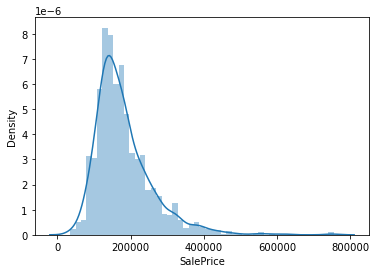

In [105]:
# Our SalesPrice is skewed right (check plot below). 
# apply the log to transform it 
ax = sns.distplot(train_labels)

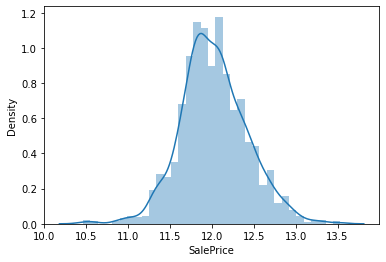

In [106]:
train_labels = np.log(train_labels)
ax = sns.distplot(train_labels)
#now it is approximately in the center

## test normality of the quantitative features 

quantitative = [f for f in train.columns if train.dtypes[f] != 'object']

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01

normal = pd.DataFrame(train[quantitative])

normal = normal.apply(test_normality)

print(not normal.any())

none of them has normal ditsirbution 


In [107]:
## Standardizing numeric features
numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

In [108]:
numeric_features

LotFrontage  LotArea  GrLivArea  TotalSF
train 0            65.0     8450       1710   2566.0
      1            80.0     9600       1262   2524.0
      2            68.0    11250       1786   2706.0
      3            60.0     9550       1717   2473.0
      4            84.0    14260       2198   3343.0
...                 ...      ...        ...      ...
test  1454         21.0     1936       1092   1638.0
      1455         21.0     1894       1092   1638.0
      1456        160.0    20000       1224   2448.0
      1457         62.0    10441        970   1882.0
      1458         74.0     9627       2000   2996.0

[2919 rows x 4 columns]

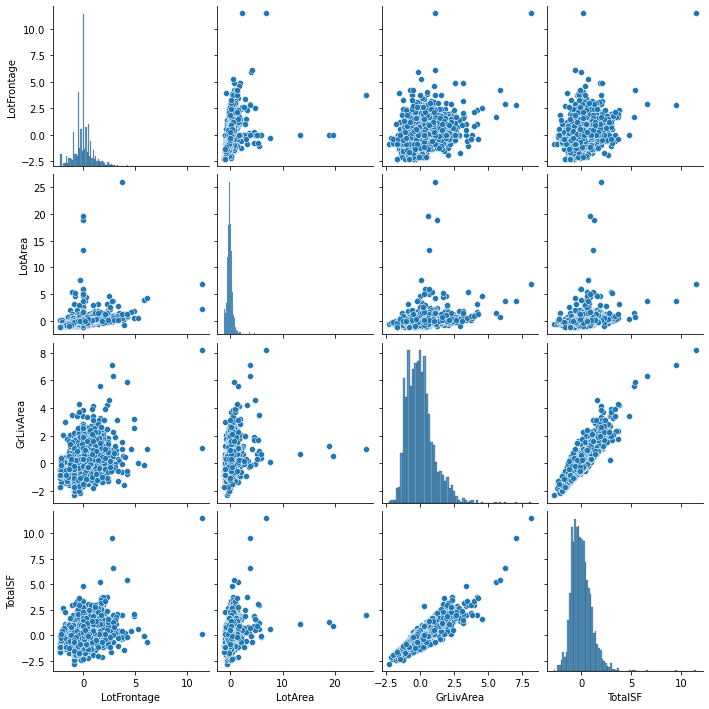

In [109]:
ax = sns.pairplot(numeric_features_standardized)

In [110]:
# Getting Dummies from all categorical vars
for col in features.dtypes[features.dtypes == 'object'].index:
    for_dummy = features.pop(col)
    features = pd.concat([features, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [111]:
features.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=283)

In [112]:
### Copying features
features_standardized = features.copy()

### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)

# Model

In [113]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
### Splitting back to tranining and testing
train_features = features.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features = features.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

### Splitting back to tranining and testing for standardized features
train_features_st = features_standardized.loc['train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features_st = features_standardized.loc['test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

In [114]:
### Shuffling training sets
train_features_st, train_features,train_labels = shuffle(train_features_st, 
                                                         train_features, train_labels, random_state = 5)
### Splitting training into training and validation data 
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st,
                                                                train_labels, test_size=0.1, random_state=200)

In [115]:
from sklearn.metrics import r2_score, mean_squared_error

# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

## Elastic Net

In [116]:
from sklearn import ensemble, tree, linear_model

In [122]:
# use ElasticNetCV estimator to choose best alpha and l1_ratio for my Elastic Net model.
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train_st, y_train_st)
train_test(ENSTest, x_train_st, x_test_st, y_train_st, y_test_st)


ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10],
             l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000)
R2: 0.9026710177993914
RMSE: 0.11834117607868949
Test
R2: 0.8969305453847545
RMSE: 0.11028346070954073


In [124]:
ENSTest.fit(x_train_st, y_train_st)
alpha = ENSTest.alpha_
ratio = ENSTest.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.5
Best alpha : 0.001


In [118]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(ENSTest, train_features_st, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.12)


## Gradient Boosting

In [120]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
train_test(GBest, x_train, x_test, y_train, y_test)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=10,
                          n_estimators=3000)
R2: 0.9618112737557506
RMSE: 0.07593635698979663
Test
R2: 0.9022172453383583
RMSE: 0.10661711154941363


In [127]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, train_features_st, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.04)


In [128]:
# Retraining models
GB_model = GBest.fit(train_features, train_labels)
ENST_model = ENSTest.fit(train_features_st, train_labels)

In [129]:
## Getting our SalePrice estimation
Final_labels = (np.exp(GB_model.predict(test_features)) + np.exp(ENST_model.predict(test_features_st))) / 2

array([116954.09366357, 155975.88594856, 181303.74598189, ...,
       154492.79157541, 120122.12224787, 220342.8184646 ])

In [131]:
## Saving to CSV
pd.DataFrame({'Id': test.Id, 'SalePrice': Final_labels}).to_csv('2017-02-28.csv', index =False)    
